# SLO Twitter Data Analysis:

### Written By: Professor Keith VanderLinden and Joseph Jinn

<span style="font-family:Papyrus; font-size:1.25em;">
    
**introductory text...**

Note: Using a subset of the entire JSON file for time-saving testing purposes.<br><br>  

</p>It seems the original "SLO analysis.ipynb" utilizes multiple JSON files that are already auto-encoded to be associated with certain SLO mining companies.  We don't have access to those JSON files, so we are currently using the "dataset_slo_20100101-20180510.json" raw Tweet file and the "dataset_20100101-20180510.csv" preprocessed Tweet file from the "sloclassifiers" directory on Borg.</p></br>

This analysis is based on and adapted from "SLO analysis.ipynb" by Shuntaro Yada from CSIRO.<br>

</span>

## Sample from raw JSON Twitter Dataset:

<span style="font-family:Papyrus; font-size:1.25em;">

The raw Tweet in JSON format is in Dictionary format as key/value pairs.<br>
The value could be a string, integer, float, or another data structure such as a List or Dictionary.<br>

Each line within the JSON file corresponds to a single Tweet.<br>

There are 4 primary objects within the Tweet JSON file.  They are the "Tweet", "User", "Entities", and "Geo" objects.  Sometimes there can also be an extended entities object.<br>

Explanation of each field is taken from the official Twitter API Documentation.<br>

</span>

<span style="font-family:Papyrus; font-size:1.25em;">
    
**Json file sample:**

{"in_reply_to_status_id_str":"305159434462691328",<br>

- If the represented Tweet is a reply, this field will contain the string representation of the original Tweet’s ID.<br>

"in_reply_to_status_id":305159434462691328,<br>

- If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID.<br>

"coordinates":null,<br>

- Represents the geographic location of this Tweet as reported by the user or client application.<br>

"created_at":"Sat Feb 23 03:40:21 +0000 2013",<br>

- UTC time when this Tweet was created.<br>

"truncated":false,<br>

- Indicates whether the value of the text parameter was truncated.<br>

"in_reply_to_user_id_str":"2768501",<br>

- If the represented Tweet is a reply, this field will contain the string representation of the original Tweet’s author ID.<br>

"source":"<a href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\">Twitter for iPhone<\/a>",<br>

- Utility used to post the Tweet, as an HTML-formatted string.<br>

"retweet_count":0,<br>

- Number of times this Tweet has been retweeted.<br>

"retweeted":false,<br>

- Indicates whether this Tweet has been Retweeted by the authenticating user.<br>

"geo":null,<br>

- This deprecated attribute has its coordinates formatted as [lat, long], while all other Tweet geo is formatted as [long, lat].<br>

"in_reply_to_screen_name":"abcnews",<br>

- If the represented Tweet is a reply, this field will contain the screen name of the original Tweet’s author.<br>

"is_quote_status":false,<br>

- Indicates whether this is a Quoted Tweet.<br>

======================================================

"entities":{<br>

- Entities which have been parsed out of the text of the Tweet.<br>

"urls":[],<br>

- Represents URLs included in the text of a Tweet.<br>

"hashtags":[],<br>

- Represents hashtags which have been parsed out of the Tweet text.<br>

"user_mentions":[{"indices":[0,8],"screen_name":"abcnews","id_str":"2768501", "name":"ABC News","id":2768501}],<br>

- Represents other Twitter users mentioned in the text of the Tweet.<br>

"symbols":[]},<br>

- Represents symbols, i.e. $cashtags, included in the text of the Tweet.<br>

======================================================

"full_text":"@abcnews About bloody time. Adani only wants FIFO Indian workers for his Bowen basin mines.",<br>

- The "extended_tweet" object provides the "full_text" field that contains the complete, untruncated Tweet message when longer than 140 characters.<br>

"id_str":"305160140833816576",<br>

- The string representation of the unique identifier for this Tweet.<br>

"in_reply_to_user_id":2768501,<br>

-  If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID.<br>

"display_text_range":[0,91],<br>

- Part of the extended Tweet object.  Contain the # of characters in the Tweet?<br>

"favorite_count":0,<br>

- Indicates approximately how many times this Tweet has been liked by Twitter users.<br>

"id":305160140833816576,<br>

- The integer representation of the unique identifier for this Tweet.<br>

"place":null,<br>

- When present, indicates that the tweet is associated (but not necessarily originating from) a Place .<br>

"contributors":null,<br>

- Can't find this field in the documentation.  Deprecated?<br>

"lang":"en",<br>

- When present, indicates a BCP 47 language identifier corresponding to the machine-detected language of the Tweet text, or und if no language could be detected.<br>

======================================================

"user":{<br>

- User object contains Twitter User account metadata that describes the Twitter User referenced.<br>

"utc_offset":36000,<br>

- Deprecated.<br>

"friends_count":1385,<br>

- The number of users this account is following (AKA their “followings”).<br>

"profile_image_url_https":"https:\/\/pbs.twimg.com\/profile_images\/698290934618787840\/SIpBKnWE_normal.jpg",<br>

- A HTTPS-based URL pointing to the user’s profile image.<br>

"listed_count":3,<br>

- The number of public lists that this user is a member of.<br>

"profile_background_image_url":"http:\/\/abs.twimg.com\/images\/themes\/theme1\/bg.png","default_profile_image":false,<br>

- - Deprecated.<br>

"favourites_count":533,<br>

- The number of Tweets this user has liked in the account’s lifetime.<br>

"description":"Train Driver extraordinaire, proud Union Leftie and Labor supporter.<br>

Cant stand the LNP and their regressive ideas. Mainly political but I do enjoy a laugh.",<br>

- The user-defined UTF-8 string describing their account.<br>

"created_at":"Tue Aug 21 23:23:52 +0000 2012",<br>

- The UTC datetime that the user account was created on Twitter.<br>

"is_translator":false,<br>

- Deprecated.<br>

"profile_background_image_url_https":"https:\/\/abs.twimg.com\/images\/themes\/theme1\/bg.png",<br>

- Deprecated.<br>

"protected":false,<br>

- When true, indicates that this user has chosen to protect their Tweets.<br>

"screen_name":"DazzDicko",<br>

- The screen name, handle, or alias that this user identifies themselves with. screen_names are unique but subject to change.<br>

"id_str":"772466924",<br>

- The string representation of the unique identifier for this User.<br>

"profile_link_color":"1DA1F2",<br>

- Deprecated.<br>

"is_translation_enabled":false,<br>

- Deprecated.<br>

"translator_type":"none",<br>

- Deprecated.<br>

"id":772466924,<br>

- The integer representation of the unique identifier for this User.<br>

"geo_enabled":true,<br>

- Deprecated.<br>

"profile_background_color":"C0DEED",<br>

- Deprecated.<br>

"lang":"en",<br>

- Deprecated.<br>

"has_extended_profile":false,<br>

- Deprecated.<br>

"profile_sidebar_border_color":"C0DEED",<br>

- Deprecated.<br>

"profile_text_color":"333333",<br>

- Deprecated.<br>

"verified":false,<br>

- When true, indicates that the user has a verified account.<br>

"profile_image_url":"http:\/\/pbs.twimg.com\/profile_images\/698290934618787840\/SIpBKnWE_normal.jpg",<br>

- Deprecated.<br>

"time_zone":"Australia\/Brisbane",<br>

- Deprecated.<br>

"url":null,<br>

- A URL provided by the user in association with their profile.<br>

"contributors_enabled":false,<br>

- Deprecated.<br>

"profile_background_tile":false,<br>

- Deprecated.<br>

********************

"entities":{"description":{"urls":[]}},<br>

- Entities which have been parsed out of the text of the Tweet.<br>

********************

"statuses_count":5176,<br>

- The number of Tweets (including retweets) issued by the user. <br>

"follow_request_sent":false,<br>

- Deprecated.<br>

"followers_count":945,<br>

- The number of followers this account currently has.<br>

"profile_use_background_image":true,<br>

- Deprecated.<br>

"default_profile":true,<br>

- When true, indicates that the user has not altered the theme or background of their user profile.<br>

"following":false,<br>

- Deprecated.<br>

"name":"Daryl Dickson",<br>

- The name of the user, as they’ve defined it. Not necessarily a person’s name. Typically capped at 50 characters, but subject to change.<br>

"location":"Far North Queensland",<br>

- The user-defined location for this account’s profile. Not necessarily a location, nor machine-parseable.<br>

"profile_sidebar_fill_color":"DDEEF6",<br>

- Deprecated.<br>

"notifications":false},<br>

- Deprecated.<br>

======================================================

"favorited":false}<br>

- Indicates whether this Tweet has been liked by the authenticating user.<br>

</span>

<span style="font-family:Papyrus; font-size:1.25em;">

Sample obtained by copy/pasting a single line from the raw JSON file and then manually separating that single line into the individual data fields.<br>

It appears that many of the fields present in the raw JSON field are "Deprecated" as the dataset was accumulated beginning over 10 years ago.<br>

</span>

## Import libraries and set parameters:

In [1]:
import logging as log
import warnings
import tensorflow as tf
import time
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

In [2]:
pd.options.display.max_rows = 100
# pd.options.display.float_format = '{:.1f}'.format
pd.set_option('precision', 7)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)


<span style="font-family:Papyrus; font-size:1.25em;">

Pandas settings alters the maximum number of rows to be displayed and the number of decimal places to display for floating point values.<br>

We also filter out several warning types to reduce output clutter.<br>

</span>

In [3]:
log.basicConfig(level=log.DEBUG)
# tf.logging.set_verbosity(tf.logging.INFO)

<span style="font-family:Papyrus; font-size:1.25em;">

Change log levels between "INFO" and "DEBUG" depending on whether you wish to see log output or not.<br>

</span>

## Import raw JSON file and break into chunks:

<span style="font-family:Papyrus; font-size:1.25em;">

We have chosen to encapsulate this section of code as a function due to the structure of our codebase.  All data analysis on the raw JSON Tweet file are individual functions that perform statistical analysis and data visualization.  We simply pass the name of the individual function to this particular function and it will automatically call the data analysis function on each individual chunk of the raw JSON Tweet file.<br>

We read in the JSON file as chunks as it is a large file approximately 3.6 GBS in size and will not fit in RAM otherwise.  We currently read in the chunks one-by-one with a chunksize of 100,000 and perform data analysis on them individually.<br>

Please refer to the code comments for the specifics as to what this function does.<br>

</span>

In [37]:
def call_data_analysis_function_on_json_file_chunks(function_name, enable_info):
    """
    This function reads the raw JSON Tweet dataset in chunk-by-chunk and calls the user-defined data analysis
    function that is specified as a parameter.

    :param function_name: name of the data analysis function to call.
    :param enable_info: enable or disable dataframe information output.

    :return: None.
    """
    # Define size of chunks to read in.
    chunksize = 100000

    # Read in the JSON file.
#     twitter_data = pd.read_json("json/dataset_slo_20100101-20180510.json",
#                                 orient='records',
#                                 lines=True,
#                                 chunksize=chunksize)

    twitter_data = pd.read_json("D:/Dropbox/summer-research-2019/json/dataset_slo_20100101-20180510.json",
                                orient='records',
                                lines=True,
                                chunksize=chunksize)

    # Create a empty Pandas dataframe.
    json_dataframe = pd.DataFrame()

    start_time = time.time()
    counter = 0
    chunk_number = 0

    for data in twitter_data:
        json_dataframe = json_dataframe.append(data, ignore_index=True)

        counter += 1
        chunk_number += 1

        # Note: Absolute file paths are required.  Relative do not work.
        csv_output_file_path = "D:/Dropbox/summer-research-2019/jupyter-notebooks/dataset-chunks/" \
                               "raw-twitter-dataset-chunk-" + str(chunk_number) + ".csv"
        json_output_file_path = "D:/Dropbox/summer-research-2019/jupyter-notebooks/dataset-chunks/" \
                                "raw-twitter-dataset-chunk-" + str(chunk_number) + ".json"

        if enable_info:
            # Print shape and column names.
            log.info("\n")
            log.info(
                f"The shape of the dataframe storing the contents of the raw JSON Tweet file chunk {chunk_number} is:")
            log.info(json_dataframe.shape)
            log.info("\n")
            log.info(
                f"The columns of the dataframe storing the contents of the raw JSON Tweet file chunk {chunk_number} is:")
            log.info(json_dataframe.columns)
            log.info("\n")
            log.info(
                f"A sample from the dataframe storing the contents of the raw JSON Tweet file chunk {chunk_number} is:")
            log.info(json_dataframe.sample(1))
            log.info("\n")

        # Limit # of chunks so we don't run out of RAM.
        if counter >= 1:
            # Export to CSV file.
            # json_dataframe.to_csv(str(csv_output_file_path), sep=',',
            #                       encoding='utf-8', index=False, header=True)
            # Export JSON file.
            # json_dataframe.to_json(str(json_output_file_path), orient='records', lines=True)

            if function_name != "None":
                # Call the data analysis functions.
                function_name(json_dataframe, chunk_number)
            # Clear the contents of the dataframe.
            json_dataframe = pd.DataFrame()
            # Reset the counter.
            counter = 0

            # For debug purposes.
            # break

    end_time = time.time()
    time_elapsed = (end_time - start_time) / 60.0

    log.info("The time taken to read in the JSON file by Chunks is: " + str(time_elapsed) + " minutes")
    log.info("The number of chunks is: " + str(chunk_number) + " based on chunk size of: " + str(chunksize))
    log.info('\n')

<span style="font-family:Papyrus; font-size:1.25em;">

This function is also capable of exporting out the chunks as individual JSON and CSV files.  These chunks are small enough to fit into RAM, at least on our system with 32 GBS of system RAM.  We have already exported the chunks to individual dataset files but have not included them in the project repository due to their collective file size.<br>

</span>

## Display raw JSON file data chunk dataframe information:

In [38]:
# Use this call to just print raw JSON file data chunk information.
call_data_analysis_function_on_json_file_chunks("None", True)

INFO:root:

INFO:root:The shape of the dataframe storing the contents of the raw JSON Tweet file chunk 1 is:
INFO:root:(100000, 30)
INFO:root:

INFO:root:The columns of the dataframe storing the contents of the raw JSON Tweet file chunk 1 is:
INFO:root:Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')
INFO:root:

INFO:root:A sample from the dataframe storing the contents of the raw JSON Tweet file chunk 1 is:
INFO:root:       contributors coordinates          created_a

INFO:root:

INFO:root:

INFO:root:The shape of the dataframe storing the contents of the raw JSON Tweet file chunk 5 is:
INFO:root:(100000, 31)
INFO:root:

INFO:root:The columns of the dataframe storing the contents of the raw JSON Tweet file chunk 5 is:
INFO:root:Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user',
       'withheld_in_countries'],
      dtype='object')
INFO:root:

INFO:root:A sample from the dataframe storing the contents of the raw JSON Tweet file chunk 5 is:
INFO:root:      

## Import preprocessed Twitter dataset CSV file:

<span style="font-family:Papyrus; font-size:1.25em;">

We read in the untokenized Twitter dataset as a CSV file and generate a Pandas dataframe from the dataset.<br>

</span>

In [5]:
# Read in the CSV file.
# tweet_dataset_processed = \
#     pd.read_csv("datasets/dataset_20100101-20180510.csv", sep=",")

tweet_dataset_processed = \
    pd.read_csv("D:/Dropbox/summer-research-2019/datasets/dataset_20100101-20180510.csv", sep=",")

# Reindex and shuffle the data randomly.
tweet_dataset_processed = tweet_dataset_processed.reindex(
    pd.np.random.permutation(tweet_dataset_processed.index))

# Generate a Pandas dataframe.
csv_dataframe = pd.DataFrame(tweet_dataset_processed)

# Print shape and column names.
log.info("\n")
log.info("The shape of our dataframe storing the contents of the preprocessed CSV Tweet file is:")
log.info(csv_dataframe.shape)
log.info("\n")
log.info("The columns of our dataframe storing the contents of the preprocessed CSV Tweet file is:")
log.info(csv_dataframe.columns)
log.info("\n")
log.info("A sample from the dataframe storing the contents of the preprocessed CSV Tweet file is:")
log.info(csv_dataframe.sample(10))
log.info("\n")

INFO:root:

INFO:root:The shape of our dataframe storing the contents of the preprocessed CSV Tweet file is:
INFO:root:(658982, 9)
INFO:root:

INFO:root:The columns of our dataframe storing the contents of the preprocessed CSV Tweet file is:
INFO:root:Index(['id', 'lang', 'language_textblob', 'retweeted', 'hashtags', 'company',
       'text', 'user_screen_name', 'user_description'],
      dtype='object')
INFO:root:

INFO:root:A sample from the dataframe storing the contents of the preprocessed CSV Tweet file is:
INFO:root:                        id lang language_textblob  retweeted  \
583865  779041164485853184   en                en      False   
166504  870230625139257344   en                en       True   
147822  866800778660397056   en                en       True   
89730   851334979506262016   en                en       True   
276289  919008642627600384   en                en      False   
232072  906314294911934464   en                en      False   
509570  7222587218045255

<span style="font-family:Papyrus; font-size:1.25em;">
 
The above log.INFO output shows the shape, columns, and a sample from the Pandas Dataframe that contains the entirety of the CSV file.<br>
 
</span>

## Tweet Properties:

In [6]:
mylog = log.getLogger("matplotlib")
mylog.setLevel(log.INFO)

<span style="font-family:Papyrus; font-size:1.25em;">

Disable "DEBUG" level messages for matplotlib specifically.<br>

</span>

In [7]:
def bar_plot(col, **kwargs):
    """
    Helper function to visualize the data.

    :param col: the columns of the graph.
    :param kwargs: variable number of arguments.
    :return: None.
    """
    ax = plt.gca()
    data = kwargs.pop('data')
    height = data[col].value_counts(normalize=True)
    height.sort_index(inplace=True)
    ax.bar(height.index, height)

<span style="font-family:Papyrus; font-size:1.25em;">

Placeholder for what this graph function does.<br>

</span>

In [8]:
def bar_plot_zipf(col, **kwargs):
    """
    Helper function to visualize the data.

    Based on Zipf's Law. (https://en.wikipedia.org/wiki/Zipf%27s_law)

    :param col: the columns of the graph.
    :param kwargs: variable number of arguments.
    :return: None.
    """
    ax = plt.gca()
    data = kwargs.pop('data')
    height = data[col].value_counts().value_counts(normalize=True)
    ax.bar(height.index, height)

<span style="font-family:Papyrus; font-size:1.25em;">

Placeholder for what this graph function does.<br>

</span>

### Time Series Statistics:

In [24]:
def time_series(json_dataframe, chunk):
    """
    Visualize the Tweet creation time based on time-date information in the raw JSON Tweet file.

    Note: The processed CSV dataset file does not contain this information.

    :param json_dataframe: the dataframe containing the JSON data chunk.
    :param chunk: the dataframe JSON data chunk number.
    :return: None.
    """
    plt.figure()
    plt.title(f"Tweet Creation TimeDate Count for Chunk: {chunk}")
    plt.xlabel("Year and Month")
    plt.ylabel("Tweet Count")
    pd.to_datetime(json_dataframe['created_at']).value_counts().resample('1D').sum().plot()
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

The function visualizes the number of Tweets that were created at a certain time-date stamp.<br>

</span>

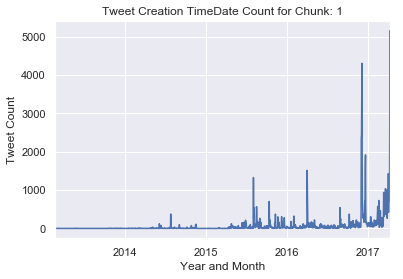

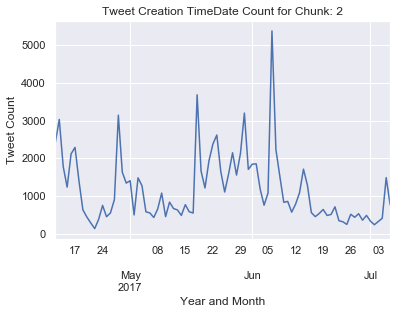

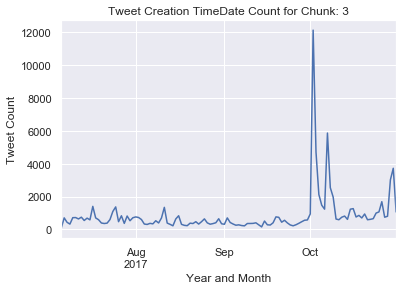

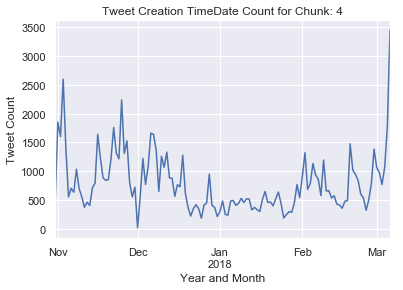

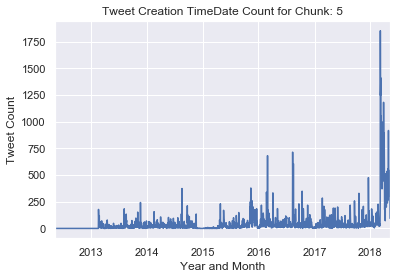

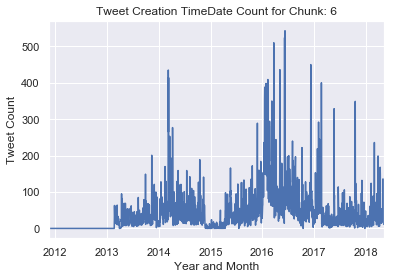

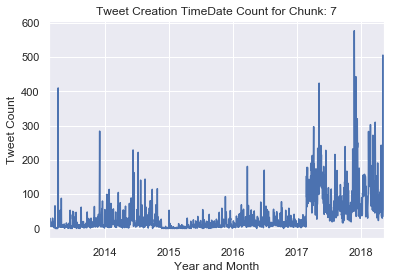

INFO:root:The time taken to read in the JSON file by Chunks is: 5.2863470077514645 minutes
INFO:root:The number of chunks is: 0 based on chunk size of 10000: 
INFO:root:



In [25]:
# Specify and call data analysis functions on chunked raw JSON Tweet file.
call_data_analysis_function_on_json_file_chunks(time_series)

<span style="font-family:Papyrus; font-size:1.25em;">

The output displays time series graphs for each individual chunk sequentially.<br>

</span>

### Re-Tweet Statistics for raw JSON dataset:

In [26]:
def json_retweeted(json_dataframe, chunk):
    """
    Re-tweet statistics and visualizations for the raw JSON file chunks.

    :param json_dataframe: the dataframe containing the JSON data chunk.
    :param chunk: the dataframe JSON data chunk number.
    :return: None.
    """
    print(f"Re-Tweet Statistics for raw JSON file data chunk {chunk}:")
    print(json_dataframe['retweeted'].value_counts())
    print()

<span style="font-family:Papyrus; font-size:1.25em;">
    
This function prints the statistics for the number of Tweets that are re-Tweets versus aren't re-Tweets for each raw JSON file chunk.<br>
    
</span>

In [27]:
# Specify and call data analysis functions on chunked raw JSON Tweet file.
call_data_analysis_function_on_json_file_chunks(json_retweeted)

Re-Tweet Statistics for raw JSON file data chunk 1:
False    100000
Name: retweeted, dtype: int64

Re-Tweet Statistics for raw JSON file data chunk 2:
False    100000
Name: retweeted, dtype: int64

Re-Tweet Statistics for raw JSON file data chunk 3:
False    100000
Name: retweeted, dtype: int64

Re-Tweet Statistics for raw JSON file data chunk 4:
False    100000
Name: retweeted, dtype: int64

Re-Tweet Statistics for raw JSON file data chunk 5:
False    100000
Name: retweeted, dtype: int64

Re-Tweet Statistics for raw JSON file data chunk 6:
False    100000
Name: retweeted, dtype: int64



INFO:root:The time taken to read in the JSON file by Chunks is: 5.230357364813487 minutes
INFO:root:The number of chunks is: 0 based on chunk size of 10000: 
INFO:root:



Re-Tweet Statistics for raw JSON file data chunk 7:
False    70423
Name: retweeted, dtype: int64



<span style="font-family:Papyrus; font-size:1.25em;">

The output displays the re-Tweet statistics for each individual chunk sequentially.<br>

</span>

### Re-Tweet Statistics for CSV dataset:

In [29]:
def csv_retweeted():
    """
    Re-tweet statistics and visualizations for the CSV Twitter preprocessed dataset.

    Note: The raw JSON file does not have associated "company" information.

    :return: None.
    """

    print("Re-Tweet Statistics for CSV dataset:")
    print(csv_dataframe['retweeted'].value_counts())
    print()

    print("Re-Tweet Statistics for CSV dataset by Company:")
    print("Number of Tweets that are or aren't re-tweets by associated company: ")
    print(csv_dataframe.groupby(['company', 'retweeted']).size())
    print()

    # Graph the Re-Tweet Statistics.
    print("Proportion of Re-Tweets versus non Re-Tweets by associated company: ")
    plt.figure()
    grid = sns.FacetGrid(csv_dataframe[['retweeted', 'company']], col='company', col_wrap=6,
                         ylim=(0, 1))
    grid.map_dataframe(bar_plot, 'retweeted').set_titles('{col_name}')
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

This function analyzes the number of re-Tweets associated with each of the companies in the dataset.<br>

</span>

Re-Tweet Statistics for CSV dataset:
True     441619
False    217363
Name: retweeted, dtype: int64

Re-Tweet Statistics for CSV dataset by Company:
Number of Tweets that are or aren't re-tweets by associated company: 
company     retweeted
adani       False        106946
            True         321505
bhp         False         40287
            True          29164
cuesta      False            63
            True             27
fortescue   False          7588
            True           4304
iluka       False          2598
            True            517
newmont     False           716
            True            178
oilsearch   False          1547
            True            656
riotinto    False         15680
            True           9898
santos      False         25497
            True          61604
whitehaven  False          6504
            True           8206
woodside    False          9937
            True           5560
dtype: int64

Proportion of Re-Tweets versus non Re-Twee

<Figure size 432x288 with 0 Axes>

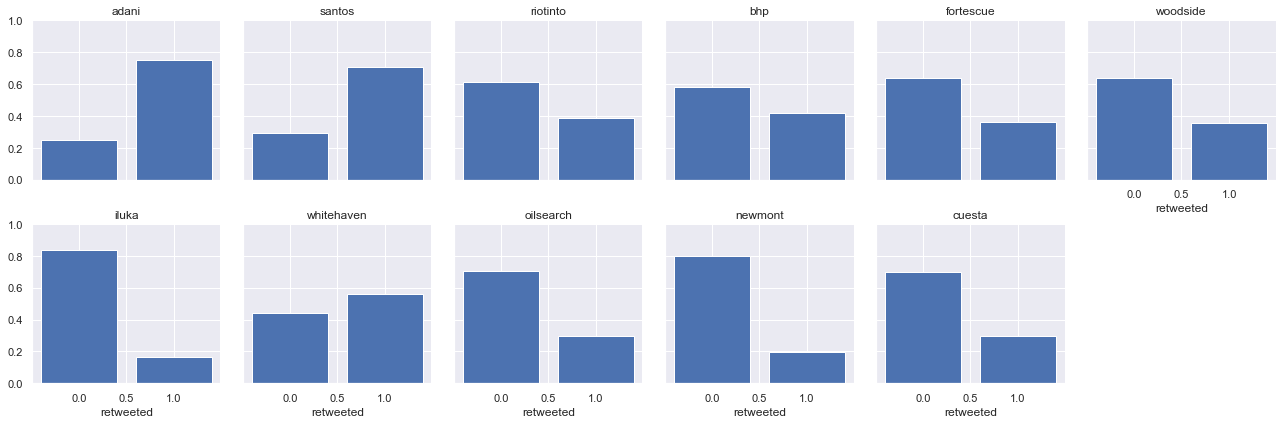

In [30]:
# Call the function.
csv_retweeted()

<span style="font-family:Papyrus; font-size:1.25em;">

The graphs show the proportion of Tweets that are or are not re-tweets by the company the Tweets are associated with.<br>

0.0 = NOT a re-tweet.<br>
1.0 = IS a re-tweet.<br>

</span>

### User Statistics:

In [31]:
def most_tweets_by_users():
    """
    User related statistics and visualizations.

    Note: The raw JSON file does not have associated "company" information.

    :return: None.
    """

    # Graph the User Statistics.
    print("Proportion of most Tweets for unique users by associated company: ")
    plt.figure()
    grid = sns.FacetGrid(csv_dataframe[['user_screen_name', 'company']], col='company', col_wrap=6,
                         ylim=(0, 1),
                         xlim=(0, 10))
    grid.map_dataframe(bar_plot_zipf, 'user_screen_name').set_titles('{col_name}').set_xlabels('appearance count')
    plt.show()

    # Adjusted parameters to allow statistics for all companies to show in output.
    pd.set_option("display.precision", 12)
    pd.options.display.max_rows = 100

    print("User Statistics for CSV dataset by Company: ")
    print("Top Tweet counts for unique user by associated company.")
    print(
        csv_dataframe[['company', 'user_screen_name']].groupby('company')
            .apply(lambda x: x['user_screen_name'].value_counts(normalize=True).head())
        # .value_counts(normalize=True)\
        # .sort_index(ascending=False).head())
    )
    print()

<span style="font-family:Papyrus; font-size:1.25em;">

This function provides text-based statistics on the users that account for the most Tweets about a given company.  It also constructs graphs that displays how much of all Tweets for a given company do those users account for.<br>

</span>

Proportion of most Tweets for unique users by associated company: 


<Figure size 432x288 with 0 Axes>

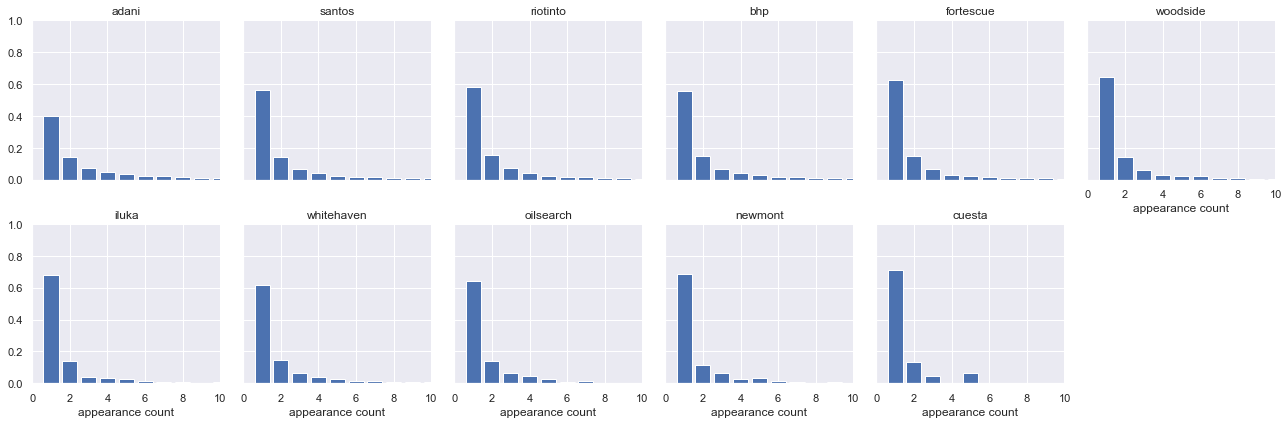

User Statistics for CSV dataset by Company: 
Top Tweet counts for unique user by associated company.
company                    
adani       WgarNews           0.015194269590
            GalileeBlockade    0.008992860327
            MarkPlackett1      0.007520113152
            SeanBradbery       0.007069653239
            garland_paige      0.006686879013
bhp         CommSec            0.026205526198
            aus_business       0.014744208147
            FinancialReview    0.013750701934
            icharttop          0.011720493585
            3novicesSydney     0.009186332810
cuesta      ABN_Newswire       0.144444444444
            proactive_au       0.133333333333
            MktTrader          0.055555555556
            ShareScene         0.055555555556
            sharecafetweets    0.055555555556
fortescue   FortescueNews      0.049781365624
            aus_business       0.016986209216
            FinancialReview    0.014547595022
            TweetingRoo        0.0123612512

In [32]:
# Call the function.
most_tweets_by_users()

<span style="font-family:Papyrus; font-size:1.25em;">

The text output displays the top 5 unique users that account for the largest proportion of Tweets that are associated with a given company.<br>

The graph output shows that there are a few users that account for the majority of Tweets about a given company.  The graphs show proportions of Tweets for each user in terms of percentages of all Tweets associated with that company.<br>

</span>

### Character Count Statistics:

In [33]:
def character_counts():
    """
    Character related statistics and visualizations.

    Note: The raw JSON file does not have associated "company" information.

    :return: None.
    """

    def relhist_proc(col, **kwargs):
        """
        Helper function to visualize the data.

        :param col: the columns of the graph.
        :param kwargs: variable number of arguments.
        :return: None.
        """
        ax = plt.gca()
        data = kwargs.pop('data')
        proc = kwargs.pop('proc')
        processed = proc(data[col])
        # relative frequency histgram
        # https://stackoverflow.com/questions/9767241/setting-a-relative-frequency-in-a-matplotlib-histogram
        ax.hist(processed, weights=np.ones_like(processed) / processed.size, **kwargs)

    def char_len(tweets):
        """
        Determine the length of the Tweet text.

        :param tweets: the Tweet text.
        :return: the length of the Tweet.
        """
        return tweets.str.len()

    print("Character Statistics for CSV dataset by Company: ")
    print("Character count relative frequency histogram: ")
    plt.figure()
    grid = sns.FacetGrid(csv_dataframe[['text', 'company']], col='company', col_wrap=6, ylim=(0, 1))
    grid.map_dataframe(relhist_proc, 'text', bins=10, proc=char_len).set_titles('{col_name}')
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

This function provides character counts for all the Tweets associated with a given company.<br>

</span>

Character Statistics for CSV dataset by Company: 
Character count relative frequency histogram: 


<Figure size 432x288 with 0 Axes>

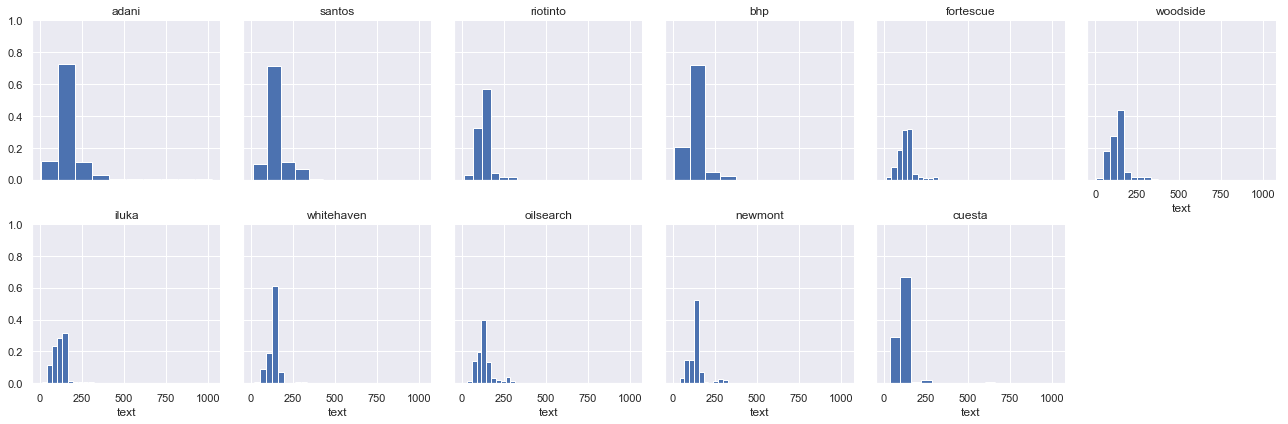

In [34]:
# Call the function.
character_counts()

<span style="font-family:Papyrus; font-size:1.25em;">

The graph outputs appear to show that most Tweets for any given company are relatively long in length.<br>

**FIXME - is this the correct interpretation?**<br>

</span>

## Resources Used:

<span style="font-family:Papyrus; font-size:1.25em;">

**TODO: convert to annotated bibliography**

Dataset Files (obtained from Borg supercomputer):<br>

dataset_slo_20100101-20180510.json<br>
dataset_20100101-20180510.csv<br>

Note: These are large fiels not included in the project GitHub Repository.<br>


- [SLO-analysis.ipynb](SLO-analysis.ipynb)<br>
    -original SLO Twitter data analysis file from Shuntaro Yada.<br>


- https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/intro-to-tweet-json<br>
    -explanation of all data fields in JSON file format for Tweets.<br>


- https://datatofish.com/export-dataframe-to-csv/<br>
- https://datatofish.com/export-pandas-dataframe-json/<br>
    -saving Pandas dataframe to CSV/JSON<br>
    

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html<br>
    -Pandas to_datetime() function call.<br>
    

- https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/
    -plotting with matplotlib.<br>


</span>

## TODO's:

<span style="font-family:Papyrus; font-size:1.25em;">

Implement further elements from Shuntaro Yada's SLO Twitter Dataset Analysis.<br>

</span>